10 marks min exam.....

Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             15 non-null     object 
 1   name                    15 non-null     object 
 2   age                     15 non-null     int64  
 3   gender                  15 non-null     object 
 4   country                 15 non-null     object 
 5   state                   15 non-null     object 
 6   city                    15 non-null     object 
 7   email_opt_in            15 non-null     bool   
 8   signup_date             15 non-null     object 
 9   last_login              15 non-null     object 
 10  total_logins            15 non-null     int64  
 11  membership_level        15 non-null     object 
 12  purchase_amount         15 non-null     float64
 13  avg_purchase_value      15 non-null     float64
 14  num_orders              15 non-n

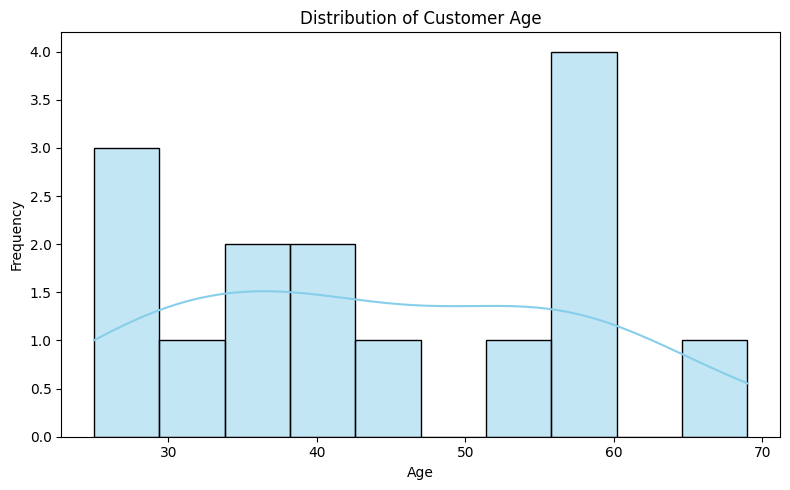

C:\Users\HP\AppData\Local\Temp\ipykernel_27164\1224729868.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', palette='Set2')


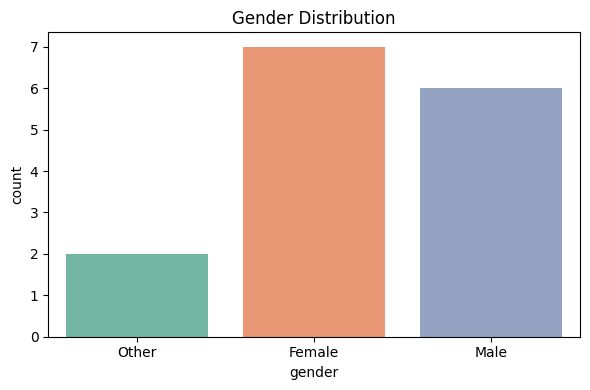

C:\Users\HP\AppData\Local\Temp\ipykernel_27164\1224729868.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='membership_level', y='purchase_amount', palette='Pastel1')


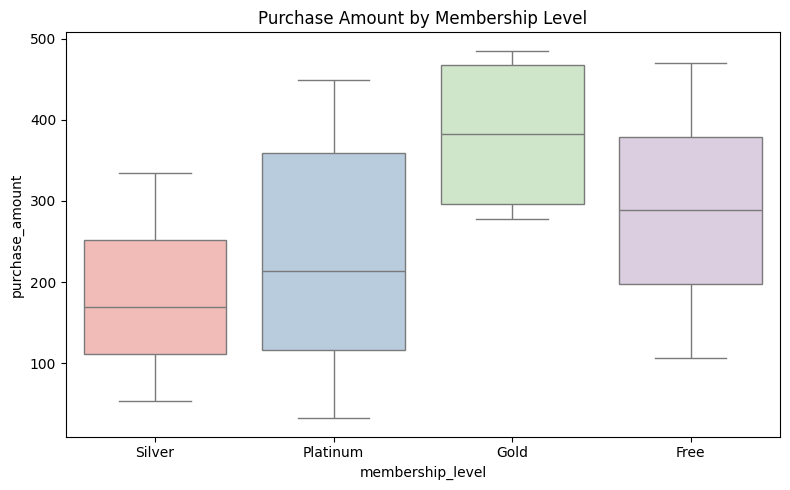

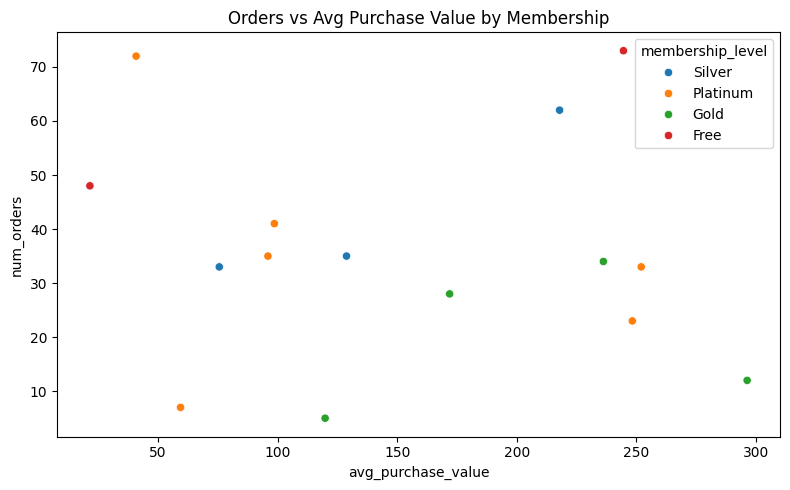

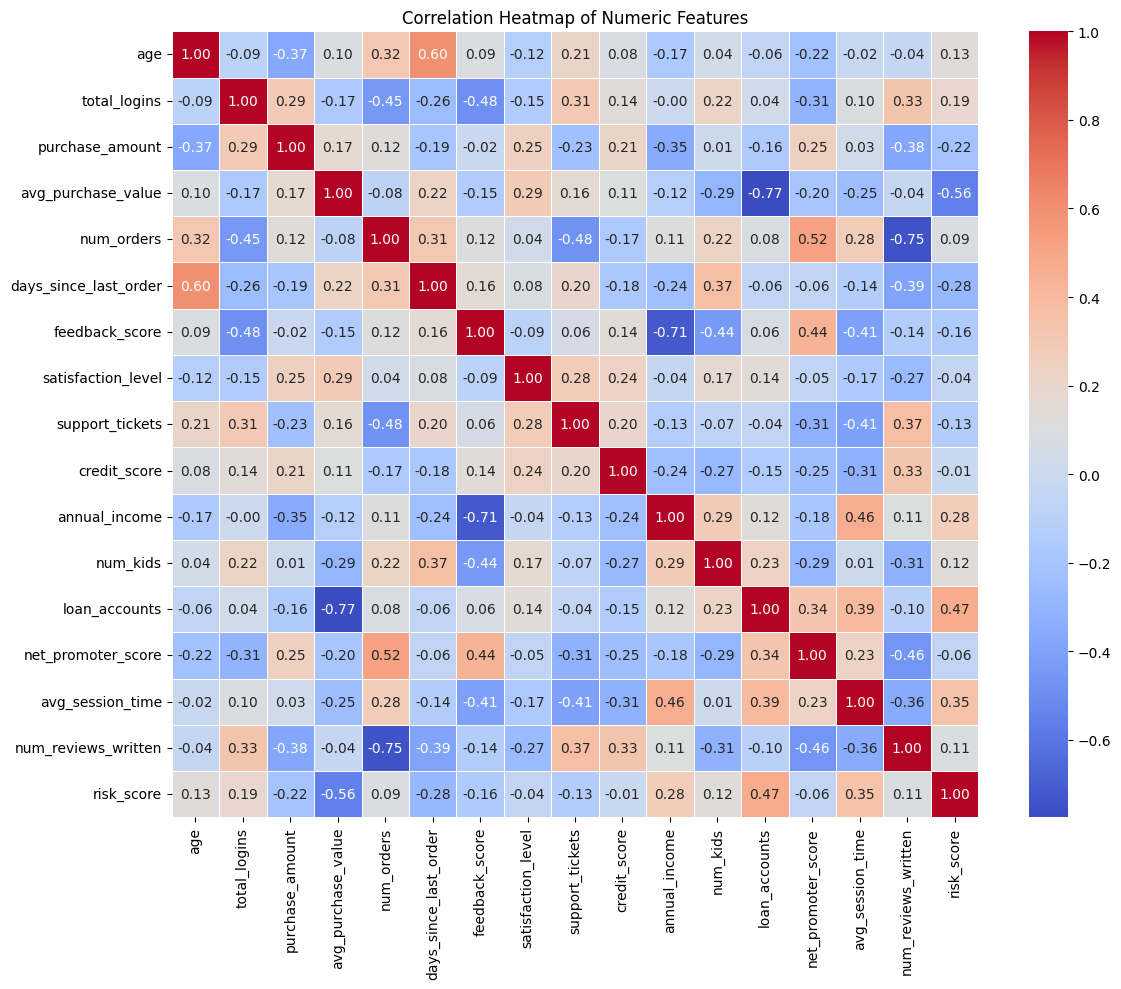

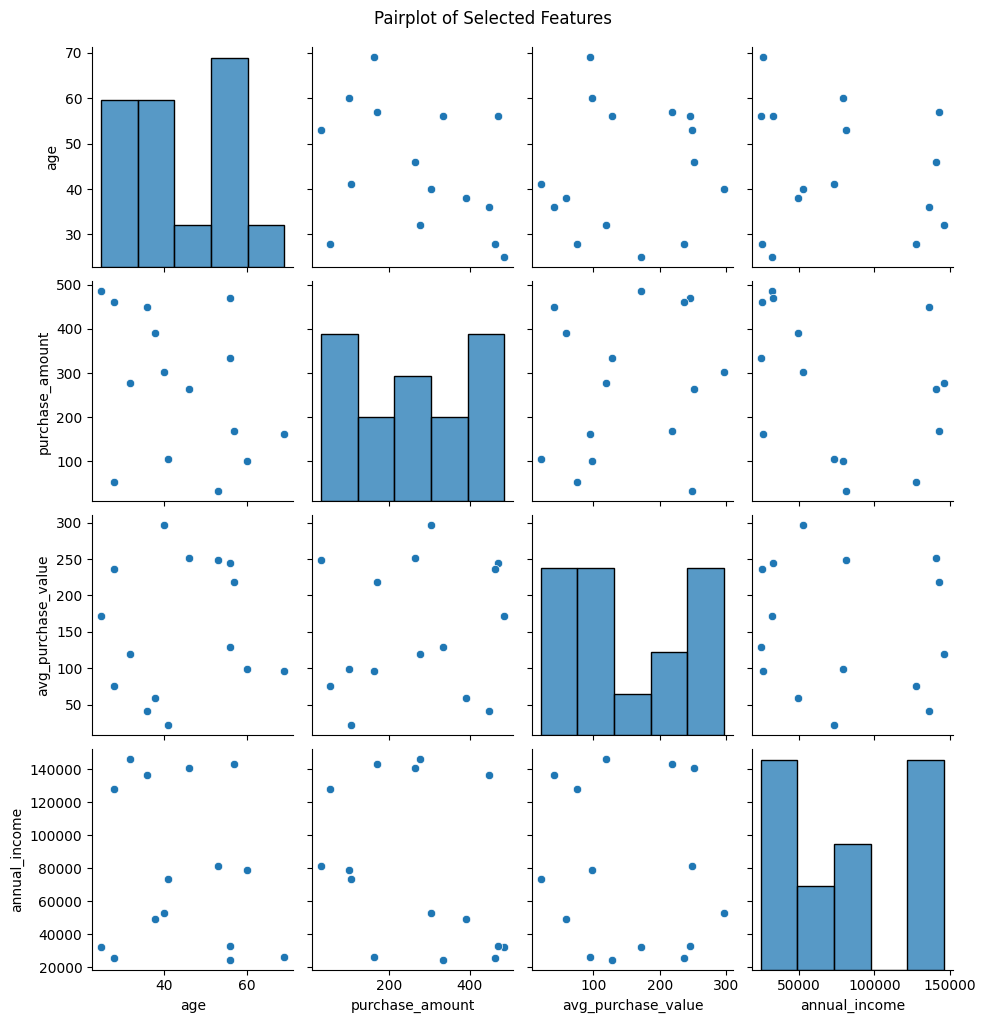

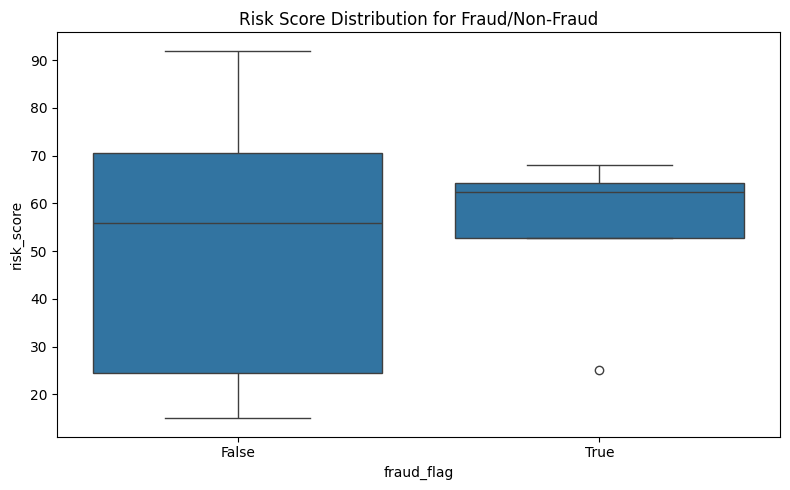

Removed 0 outliers using Z-score method
EDA + Feature Engineering + Encoding + Outlier removal complete.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from scipy import stats

df = pd.read_csv("synthetic_customer_data.csv")

print("Data Info:\n")
print(df.info())
print("\nSummary Statistics:\n")
print(df.describe(include='all'))

categorical_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\nCategorical Columns:", categorical_cols)
print("\nNumerical Columns:", numerical_cols)

plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=10, kde=True, color='skyblue')
plt.title("Distribution of Customer Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='gender', palette='Set2')
plt.title("Gender Distribution")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='membership_level', y='purchase_amount', palette='Pastel1')
plt.title("Purchase Amount by Membership Level")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='avg_purchase_value', y='num_orders', hue='membership_level')
plt.title("Orders vs Avg Purchase Value by Membership")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 10))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()

selected_cols = ['age', 'purchase_amount', 'avg_purchase_value', 'annual_income']
sns.pairplot(df[selected_cols])
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='fraud_flag', y='risk_score')
plt.title("Risk Score Distribution for Fraud/Non-Fraud")
plt.tight_layout()
plt.show()

df['spend_per_order'] = df['purchase_amount'] / (df['num_orders'] + 1)

df['age_group'] = pd.cut(df['age'], bins=[18, 30, 45, 60, 80], labels=['18-30', '31-45', '46-60', '61+'])

scaler = StandardScaler()
df[['age_scaled', 'purchase_amount_scaled']] = scaler.fit_transform(df[['age', 'purchase_amount']])

le = LabelEncoder()
df['gender_encoded'] = le.fit_transform(df['gender'])
df = pd.get_dummies(df, columns=['membership_level', 'preferred_device'], drop_first=True)

z_scores = np.abs(stats.zscore(df[numerical_cols]))
filtered_entries = (z_scores < 3).all(axis=1)
df_no_outliers = df[filtered_entries]
print(f"Removed {len(df) - len(df_no_outliers)} outliers using Z-score method")

df_no_outliers.to_csv("cleaned_customer_data.csv", index=False)

print("EDA + Feature Engineering + Encoding + Outlier removal complete.")


In [ ]:
#Shows how customer ages are spread. Helps spot if most customers are younger, older, or mid-age.
#Simple bar chart showing how many male vs female (or others) customers are there.
#Boxplot helps compare how much people spend based on their membership level.
#Shows relationship between how often people buy and how much they usually spend.
#Highlights strong or weak relationships between numeric features like age, income, spend.
#Visual comparison of multiple numeric columns to spot trends and clustering.
#Compares risk scores between fraudulent and non-fraud customers.



In [ ]:
print("eda process is completed....")